In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Standard_Scaler_result.csv",encoding="cp949")

In [3]:
data.head()

,CUSTNO,GNO,CBSCORE,CBSCOREGRD,CREDITOTAMT,YSALEAMT,ESTMM,ASSETAMT,IMSAAMT,IMJUAMT,...,KIND_JOB_K,KIND_JOB_L,KIND_JOB_M,KIND_JOB_N,KIND_JOB_O,KIND_JOB_P,KIND_JOB_Q,KIND_JOB_R,KIND_JOB_S,KIND_JOB_T
0,475821,l180202101898,1.483693,-1.008776,-0.182324,5.599410,-0.351065,-0.497246,-0.176818,-0.327516,...,0,0,0,0,0,0,0,0,0,0
1,74417,l230201700120,0.436620,-0.269293,-0.187359,3.004204,-0.774902,-0.434147,-0.395499,0.047573,...,0,0,0,0,0,0,0,0,0,0
2,387787,l110201603233,0.682990,-1.008776,-0.283032,1.765241,1.889216,-0.497246,-0.176818,-0.327516,...,0,0,0,0,0,0,0,0,0,0
3,395418,l230201700254,0.169719,-0.269293,-0.212536,1.647960,-0.744628,-0.497246,-0.176818,-0.327516,...,0,0,0,0,0,0,0,0,0,0
4,190372,l200201601418,-3.033092,2.688638,-0.247784,0.478163,1.616749,-0.202785,-0.351763,-0.327516,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['CUSTNO', 'GNO', 'CBSCORE', 'CBSCOREGRD', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'BIZNML_x', 'LABORCNT', 'ACTCD', 'KOSPI', '환율',
       'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률', '소비자심리지수',
       'KIND_JOB', 'KIND_JOB_A', 'KIND_JOB_B', 'KIND_JOB_C', 'KIND_JOB_D',
       'KIND_JOB_E', 'KIND_JOB_F', 'KIND_JOB_G', 'KIND_JOB_H', 'KIND_JOB_I',
       'KIND_JOB_J', 'KIND_JOB_K', 'KIND_JOB_L', 'KIND_JOB_M', 'KIND_JOB_N',
       'KIND_JOB_O', 'KIND_JOB_P', 'KIND_JOB_Q', 'KIND_JOB_R', 'KIND_JOB_S',
       'KIND_JOB_T'],
      dtype='object')

In [5]:
features = data[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM',  'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'LABORCNT', 'KOSPI', '환율', 'GDP', 
       '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','KIND_JOB_A', 'KIND_JOB_B', 'KIND_JOB_C', 'KIND_JOB_D',
       'KIND_JOB_E', 'KIND_JOB_F', 'KIND_JOB_G', 'KIND_JOB_H', 'KIND_JOB_I',
       'KIND_JOB_J', 'KIND_JOB_K', 'KIND_JOB_L', 'KIND_JOB_M', 'KIND_JOB_N',
       'KIND_JOB_O', 'KIND_JOB_P', 'KIND_JOB_Q', 'KIND_JOB_R', 'KIND_JOB_S',
       'KIND_JOB_T']]
act = data['ACTCD']

#BorderlineSMOTE 기법 활용

In [6]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

In [7]:

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 41) (11736, 41) (27381,) (11736,)


In [8]:
sm = BorderlineSMOTE(random_state=42)
over_train_x, over_train_y = sm.fit_resample(train_x,train_y)
'''
over_train_x : 학습용 독립변수
over_train_y : 학습용 종속변수
'''

'\nover_train_x : 학습용 독립변수\nover_train_y : 학습용 종속변수\n'

In [9]:
from sklearn.neighbors import KNeighborsClassifier

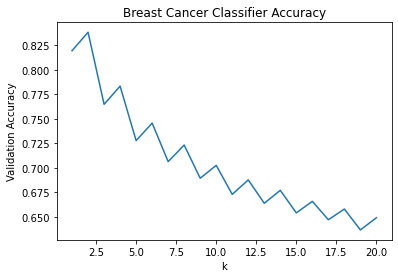

0.8382753919563736


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_BOST = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    matrix_kd_tree_uniform_BOST.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [11]:
matrix_kd_tree_uniform_BOST

[(1,
  0.23198773633111905,
  0.42429906542056073,
  0.2999669639907499,
  0.6416920041147431,
  0.8194444444444444,
  array([[9163, 1503],
         [ 616,  454]], dtype=int64)),
 (2,
  0.24349442379182157,
  0.36728971962616824,
  0.2928464977645306,
  0.6264069074410609,
  0.8382753919563736,
  array([[9445, 1221],
         [ 677,  393]], dtype=int64)),
 (3,
  0.19108512970405553,
  0.48878504672897194,
  0.27475702653007616,
  0.6406047866309401,
  0.7647409679618269,
  array([[8452, 2214],
         [ 547,  523]], dtype=int64)),
 (4,
  0.19877300613496932,
  0.4542056074766355,
  0.2765291607396871,
  0.6352689391217793,
  0.7833162917518746,
  array([[8707, 1959],
         [ 584,  486]], dtype=int64)),
 (5,
  0.17650639074863056,
  0.5420560747663551,
  0.2662993572084481,
  0.6441763591532881,
  0.7276755282890253,
  array([[7960, 2706],
         [ 490,  580]], dtype=int64)),
 (6,
  0.17981283422459893,
  0.502803738317757,
  0.26489414081733137,
  0.6363634292563846,
  0.74556918

In [12]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.86      0.90     10666
        정상보증       0.23      0.42      0.30      1070

    accuracy                           0.82     11736
   macro avg       0.58      0.64      0.60     11736
weighted avg       0.87      0.82      0.84     11736



In [13]:
from imblearn.under_sampling import EditedNearestNeighbours

In [14]:
enn = EditedNearestNeighbours()
over_train_x,over_train_y = enn.fit_resample(train_x,train_y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

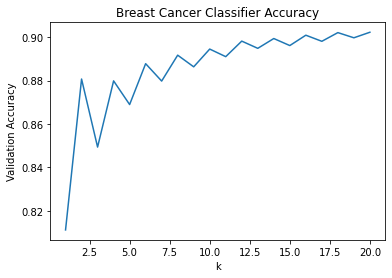

0.902266530334015


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ENN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ENN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [17]:
matrix_kd_tree_uniform_ENN

[(1,
  0.2239884393063584,
  0.43457943925233644,
  0.2956134774316593,
  0.6417693746046045,
  0.8111792774369462,
  array([[9055, 1611],
         [ 605,  465]], dtype=int64)),
 (2,
  0.3094688221709007,
  0.2504672897196262,
  0.2768595041322314,
  0.5972006427971841,
  0.8807089297886844,
  array([[10068,   598],
         [  802,   268]], dtype=int64)),
 (3,
  0.24855907780979827,
  0.32242990654205606,
  0.2807160292921074,
  0.6123212724159747,
  0.8493524199045671,
  array([[9623, 1043],
         [ 725,  345]], dtype=int64)),
 (4,
  0.2837150127226463,
  0.20841121495327103,
  0.24030172413793102,
  0.5778133329594782,
  0.8798568507157464,
  array([[10103,   563],
         [  847,   223]], dtype=int64)),
 (5,
  0.2719298245614035,
  0.2607476635514019,
  0.2662213740458016,
  0.5953560181623502,
  0.8689502385821404,
  array([[9919,  747],
         [ 791,  279]], dtype=int64)),
 (6,
  0.30551181102362207,
  0.18130841121495328,
  0.22756598240469209,
  0.5699810385345345,
  0.88

In [18]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.85      0.89     10666
        정상보증       0.22      0.43      0.30      1070

    accuracy                           0.81     11736
   macro avg       0.58      0.64      0.59     11736
weighted avg       0.87      0.81      0.84     11736



In [19]:
from imblearn.over_sampling import ADASYN


In [20]:
ADA = ADASYN(random_state=42,)
over_train_x,over_train_y = ADA.fit_resample(train_x,train_y)
from sklearn.neighbors import KNeighborsClassifier

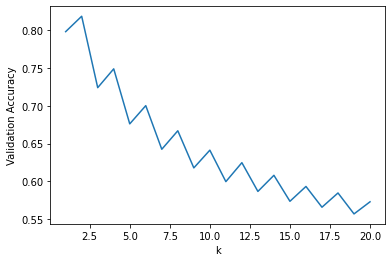

0.8183367416496251


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ADA = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ADA.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [22]:
matrix_kd_tree_uniform_ADA

[(1,
  0.21280353200883,
  0.4504672897196262,
  0.2890554722638681,
  0.6416502959005032,
  0.7979720518064076,
  array([[8883, 1783],
         [ 588,  482]], dtype=int64)),
 (2,
  0.22543950361944157,
  0.4074766355140187,
  0.29027962716378164,
  0.6335151788108252,
  0.8183367416496251,
  array([[9168, 1498],
         [ 634,  436]], dtype=int64)),
 (3,
  0.17358604091456076,
  0.5392523364485982,
  0.26263086026399635,
  0.6408524948697144,
  0.7239263803680982,
  array([[7919, 2747],
         [ 493,  577]], dtype=int64)),
 (4,
  0.18341200269723534,
  0.508411214953271,
  0.269573835480674,
  0.6406672613300013,
  0.7488070892978869,
  array([[8244, 2422],
         [ 526,  544]], dtype=int64)),
 (5,
  0.16053677932405566,
  0.6037383177570094,
  0.2536317235963879,
  0.6435155117755607,
  0.6760395364689843,
  array([[7288, 3378],
         [ 424,  646]], dtype=int64)),
 (6,
  0.16716499048654526,
  0.5747663551401869,
  0.25900189513581806,
  0.6437492004465233,
  0.70015337423312

In [23]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.83      0.88     10666
        정상보증       0.21      0.45      0.29      1070

    accuracy                           0.80     11736
   macro avg       0.57      0.64      0.58     11736
weighted avg       0.87      0.80      0.83     11736



In [24]:
from imblearn.combine import SMOTEENN

SMT = SMOTEENN(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

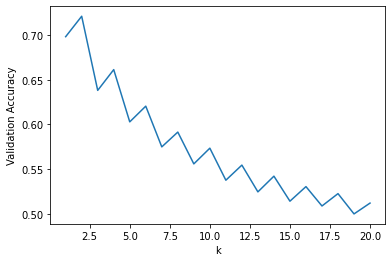

0.7209441036128152


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTEN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTEN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [26]:
matrix_kd_tree_uniform_SMTEN

[(1,
  0.17417654808959157,
  0.6177570093457944,
  0.2717368961973278,
  0.6619630724583838,
  0.6981083844580777,
  array([[7532, 3134],
         [ 409,  661]], dtype=int64)),
 (2,
  0.18200173060282665,
  0.5897196261682243,
  0.27815737271324664,
  0.6619140039710426,
  0.7209441036128152,
  array([[7830, 2836],
         [ 439,  631]], dtype=int64)),
 (3,
  0.15683732987686325,
  0.6785046728971963,
  0.2547815406211616,
  0.6562877761635804,
  0.6381220177232447,
  array([[6763, 3903],
         [ 344,  726]], dtype=int64)),
 (4,
  0.16385096042582736,
  0.6616822429906543,
  0.2626599888703395,
  0.6614711608727882,
  0.6612985685071575,
  array([[7053, 3613],
         [ 362,  708]], dtype=int64)),
 (5,
  0.15009746588693956,
  0.719626168224299,
  0.24838709677419352,
  0.6554253098762598,
  0.6029311520109066,
  array([[6306, 4360],
         [ 300,  770]], dtype=int64)),
 (6,
  0.15384615384615385,
  0.702803738317757,
  0.25243370258476,
  0.6575147512140069,
  0.62048398091342

In [27]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.95      0.71      0.81     10666
        정상보증       0.17      0.62      0.27      1070

    accuracy                           0.70     11736
   macro avg       0.56      0.66      0.54     11736
weighted avg       0.88      0.70      0.76     11736



In [28]:
from imblearn.combine import SMOTETomek

SMT = SMOTETomek(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

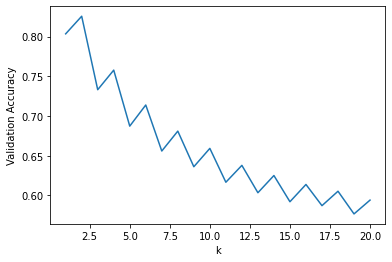

0.8255794137695979


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTTK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTTK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [30]:
matrix_kd_tree_uniform_SMTTK

[(1,
  0.21796625626994984,
  0.44672897196261685,
  0.29298191847992644,
  0.6429688362532004,
  0.8034253578732107,
  array([[8951, 1715],
         [ 592,  478]], dtype=int64)),
 (2,
  0.23465507876154265,
  0.40373831775700936,
  0.2968052215733425,
  0.6358181556908055,
  0.8255794137695979,
  array([[9257, 1409],
         [ 638,  432]], dtype=int64)),
 (3,
  0.1782147315855181,
  0.5336448598130841,
  0.2671970051474029,
  0.6433928405572076,
  0.7331288343558282,
  array([[8033, 2633],
         [ 499,  571]], dtype=int64)),
 (4,
  0.18708083303918108,
  0.4953271028037383,
  0.27158595951831926,
  0.6397036789098384,
  0.7577539195637355,
  array([[8363, 2303],
         [ 540,  530]], dtype=int64)),
 (5,
  0.16356107660455488,
  0.5906542056074766,
  0.2561815970814755,
  0.6438176334619045,
  0.6872869802317655,
  array([[7434, 3232],
         [ 438,  632]], dtype=int64)),
 (6,
  0.17295597484276728,
  0.5654205607476636,
  0.2648861646234676,
  0.647092429258137,
  0.7138718473

In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.84      0.89     10666
        정상보증       0.21      0.44      0.29      1070

    accuracy                           0.80     11736
   macro avg       0.58      0.64      0.59     11736
weighted avg       0.87      0.80      0.83     11736



In [32]:
from imblearn.under_sampling import TomekLinks

SMT = TomekLinks()
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

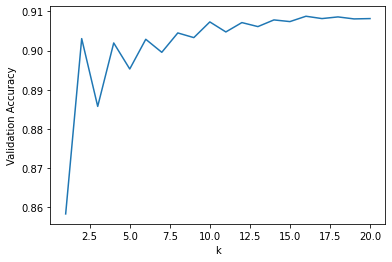

0.9087423312883436


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_TK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_TK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [34]:
matrix_kd_tree_uniform_TK

[(1,
  0.27520849128127367,
  0.33925233644859815,
  0.3038928421933864,
  0.6248108672679894,
  0.8582992501704159,
  array([[9710,  956],
         [ 707,  363]], dtype=int64)),
 (2,
  0.41005291005291006,
  0.14485981308411214,
  0.21408839779005523,
  0.5619761281809085,
  0.9030334014996592,
  array([[10443,   223],
         [  915,   155]], dtype=int64)),
 (3,
  0.30888575458392104,
  0.2046728971962617,
  0.2462057335581788,
  0.5793662629615286,
  0.8857361963190185,
  array([[10176,   490],
         [  851,   219]], dtype=int64)),
 (4,
  0.36721311475409835,
  0.10467289719626169,
  0.1629090909090909,
  0.5432890081331018,
  0.9019256987048399,
  array([[10473,   193],
         [  958,   112]], dtype=int64)),
 (5,
  0.3275488069414317,
  0.1411214953271028,
  0.19725669497060747,
  0.5560285894036601,
  0.8952794819359237,
  array([[10356,   310],
         [  919,   151]], dtype=int64)),
 (6,
  0.34782608695652173,
  0.07476635514018691,
  0.12307692307692306,
  0.530351488089

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.93      0.91      0.92     10666
        정상보증       0.28      0.34      0.30      1070

    accuracy                           0.86     11736
   macro avg       0.60      0.62      0.61     11736
weighted avg       0.87      0.86      0.87     11736



In [36]:
sorted(matrix_kd_tree_uniform_BOST,key=lambda x: x[3])

[(19,
  0.1579961464354528,
  0.6897196261682244,
  0.25709806653893047,
  0.6604889149029759,
  0.6365882753919564,
  array([[6733, 3933],
         [ 332,  738]], dtype=int64)),
 (17,
  0.16089163540057383,
  0.6813084112149532,
  0.26031065881092663,
  0.6624243162393911,
  0.6469836400817995,
  array([[6864, 3802],
         [ 341,  729]], dtype=int64)),
 (20,
  0.16114692153811958,
  0.677570093457944,
  0.26036990483031064,
  0.6618677393972637,
  0.6490286298568507,
  array([[6892, 3774],
         [ 345,  725]], dtype=int64)),
 (15,
  0.16203389830508474,
  0.6700934579439253,
  0.26096451319381253,
  0.6612233650117151,
  0.6539706884798909,
  array([[6958, 3708],
         [ 353,  717]], dtype=int64)),
 (18,
  0.16358236234864063,
  0.6691588785046729,
  0.2628970075270791,
  0.6629593379960079,
  0.6578902522154055,
  array([[7005, 3661],
         [ 354,  716]], dtype=int64)),
 (13,
  0.16433239962651727,
  0.6579439252336449,
  0.2629809488233097,
  0.6611489736800138,
  0.6637

In [ ]:
sorted(matrix_kd_tree_uniform_ENN,key=lambda x: x[3])

In [ ]:
sorted(matrix_kd_tree_uniform_ADA,key=lambda x: x[3])

In [ ]:
sorted(matrix_kd_tree_uniform_SMTEN,key=lambda x: x[3])

In [ ]:
sorted(matrix_kd_tree_uniform_SMTTK,key=lambda x: x[3])